# 波士顿房价数据探索

该数据集来自UCI机器学习知识库。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋13种特征和房价的信息。
本项目将原始数据集存为csv格式，方便调用pandas做数据分析。

输入:  地区的属性13个特征 x 
* CRIM：城镇人均犯罪率 
* ZN：住宅用地超过25000 sq.ft. 的比例 
* INDUS：城镇非零售商用土地的比例 
* CHAS：是否在查理斯河边（如果边界是河流，则为1；否则为0） 
* NOX：一氧化氮浓度 
* RM：住宅平均房间数 
* AGE：1940 年之前建成的自用房屋比例 
* DIS：到波士顿五个中心区域的加权距离 
* RAD：辐射性公路的接近指数 
* TAX：每10000 美元的全值财产税率 
* PTRATIO：城镇师生比例 
* B：1000（Bk-0.63）2，其中Bk 指代城镇中黑人的比例 
* LSTAT：人口中地位低下者的比例

输出：地区房价均值 y 
* MEDV：自住房的平均房价（单位：千美元）

## 导入必要的工具包

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()
from zhou_utils.utils_zhou import show_number_describe
%matplotlib inline

## 读取数据

In [2]:
# path to where the data lies
dpath = './data/'  
data = pd.read_csv(dpath +"boston_housing.csv")
# type(data) = pandas.core.frame.DataFrame
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18,396.90,5.33,36.2


## 数据基本信息

In [3]:
show_number_describe(data)

共有：[506]条样本，特征数为：[14]，其中有[14]个特征是number
使用内存大小为: [55.42] KB


,count,mean,std,min,25%,50%,75%,max,dif_vals,dtype,num_null
CRIM,506,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762,504,float64,0
ZN,506,11.347826,23.310593,0.00000,0.000000,0.00000,12.000000,100.0000,26,int64,0
INDUS,506,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,76,float64,0
CHAS,506,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,2,int64,0
NOX,506,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,81,float64,0
RM,506,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,446,float64,0
AGE,506,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,356,float64,0
DIS,506,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,412,float64,0
RAD,506,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,9,int64,0
TAX,506,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,66,int64,0


共有506条样本， 13列特征，一个label，
全部都是数值型特征，都没有空缺值

此处得到各属性的样本数目(count)、均值(mean)、标准差(std)、最小值、1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、最大值
可初步了解各特征的分布

## 探索数据

查看数据各特征的分布，以及特征之间是否存在相关关系等冗余。

我们可以借用可视化工具来直观感觉数据的分布。

在Python中，有很多数据可视化途径。
Matplotlib非常强大，也很复杂，不易于学习。 
Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。

### 单变量分布分析

### 单变量分布分析 - 数值型

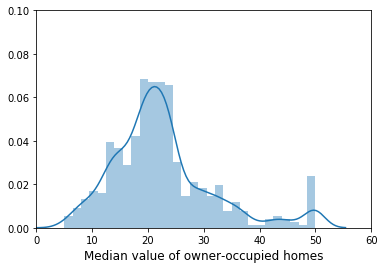

In [4]:
# 目标y（房屋价格）的直方图／分布
#fig = plt.figure()   #创建一幅图
sns.distplot(data.MEDV.values, bins=30, kde=True)    #kde:核密度估计曲线
plt.xlabel('Median value of owner-occupied homes', fontsize=12)
plt.axis([0,60, 0,0.1])     #[xmin xmax ymin ymax]
plt.show()

房价的灰度图还算是有点符合正态分布, 只是尾巴那里的好多50, 估计是被人截断过, 毕竟特别贵的房子也没人去租. 大量的样本集中在20附近

Text(0.5,1,'Distribution of Price')

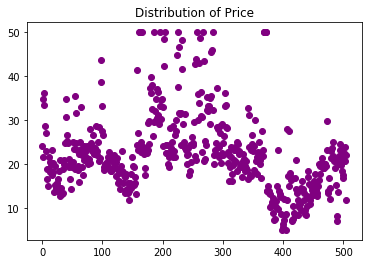

In [5]:
# 单个特征散点图
x = range(data.shape[0])
y = data["MEDV"].values
plt.scatter(x, y,color='purple',)
plt.title("Distribution of Price")
# 用散点图看也差不多是这种情况

## 输入属性的直方图／分布

In [6]:
# CHAS, RAD, PTRATIO看做是分类特征
cat = ['CHAS', 'RAD', 'PTRATIO']
num = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT', 'MEDV']

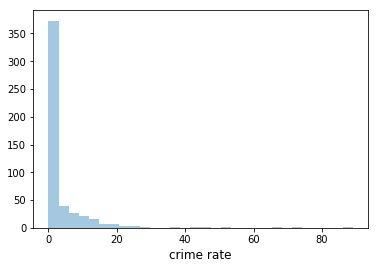

In [7]:
fig = plt.figure()
sns.distplot(data.CRIM.values, bins=30, kde=False)
plt.xlabel('crime rate', fontsize=12)
plt.show()

犯罪率特征的分布是长尾分布，和指数分布比较接近。大部分城镇的犯罪率很低，极少数样本的犯罪率高。从常理看，该数值应该比较准确，可以不予处理。

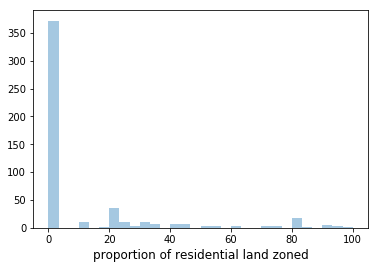

In [8]:
fig = plt.figure()
sns.distplot(data.ZN.values, bins=30, kde=False)
plt.xlabel('proportion of residential land zoned', fontsize=12)
plt.show()

住宅用地的面积超过25000 sq.ft.比例,    
0是没有, 数量不少, 可以单独做一个新特征

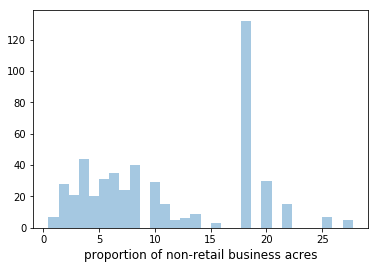

In [9]:
fig = plt.figure()
sns.distplot(data.INDUS.values, bins=30, kde=False)
plt.xlabel('proportion of non-retail business acres', fontsize=12)
plt.show()

城镇非零售商用土地的比例   


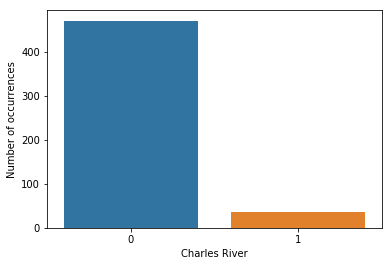

In [10]:
sns.countplot(data.CHAS, order=[0, 1]);
plt.xlabel('Charles River');
plt.ylabel('Number of occurrences');

是否在查理斯河边（如果边界是河流，则为1；否则为0）   
好多房子都不在河边, 

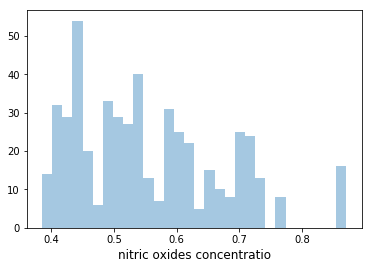

In [11]:
fig = plt.figure()
sns.distplot(data.NOX.values, bins=30, kde=False)
plt.xlabel('nitric oxides concentratio', fontsize=12)
plt.show()

一氧化氮浓度   
空气的污染程度吧, 附近工厂的多少

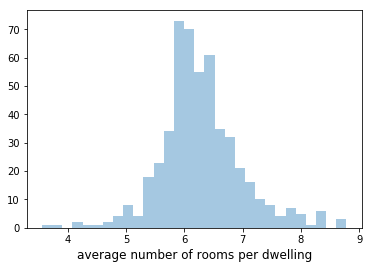

In [12]:
fig = plt.figure()
sns.distplot(data.RM.values, bins=30, kde=False)
plt.xlabel('average number of rooms per dwelling', fontsize=12)
plt.show()

住宅平均房间数   
这个还真是特别像是正态分布, 很漂亮的趋势
大多数的房间数目集中在6间

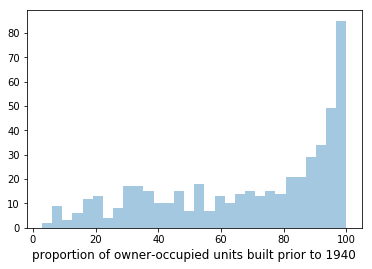

In [13]:
fig = plt.figure()
sns.distplot(data.AGE.values, bins=30, kde=False)
plt.xlabel('proportion of owner-occupied units built prior to 1940', fontsize=12)
plt.show()

1940 年之前建成的自用房屋比例   
附近老房子的比例   
大部分地区的房子都是老房子呢

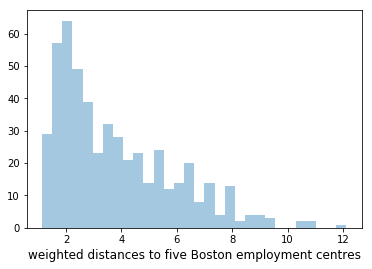

In [14]:
fig = plt.figure()
sns.distplot(data.DIS.values, bins=30, kde=False)
plt.xlabel('weighted distances to five Boston employment centres', fontsize=12)
plt.show()

到波士顿五个中心区域的加权距离   
交通的便利程度   
大部分都不远, 还可以

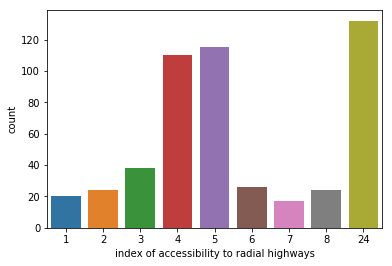

In [15]:
sns.countplot(data.RAD);
plt.xlabel('index of accessibility to radial highways');

辐射性公路的接近指数   
这个不太慬是什么意思   
难道也是交通便利程度  
这个8之后直接是24??

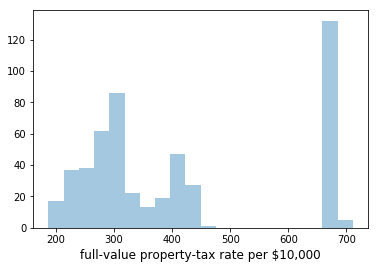

In [16]:
fig = plt.figure()
sns.distplot(data.TAX.values, bins=20, kde=False)
plt.xlabel('full-value property-tax rate per $10,000', fontsize=12)
plt.show()

每10000 美元的全值财产税率
好奇怪, 有好大一个断层, 难道有钱人真的特别有钱?

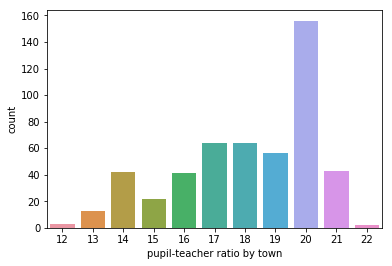

In [17]:
sns.countplot(data.PTRATIO);
plt.xlabel('pupil-teacher ratio by town');

城镇师生比例    
20居然特别多, 其它不差太多
传说中的学区房?

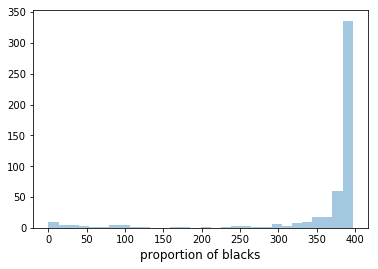

In [18]:
fig = plt.figure()
sns.distplot(data.B.values, bins=30, kde=False)
plt.xlabel('proportion of blacks', fontsize=12)
plt.show()

Bk 指代城镇中黑人的比例
这个难道说黑人穷, 变相的种族歧视?


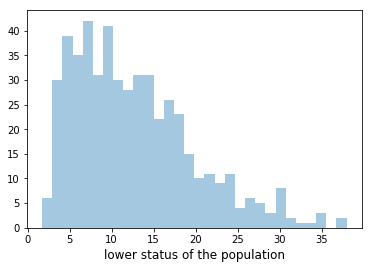

In [19]:
fig = plt.figure()
sns.distplot(data.LSTAT.values, bins=30, kde=False)
plt.xlabel('lower status of the population', fontsize=12)
plt.show()

人口中地位低下者的比例

## 两两特征之间的相关性

In [20]:
#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = data.corr().abs()

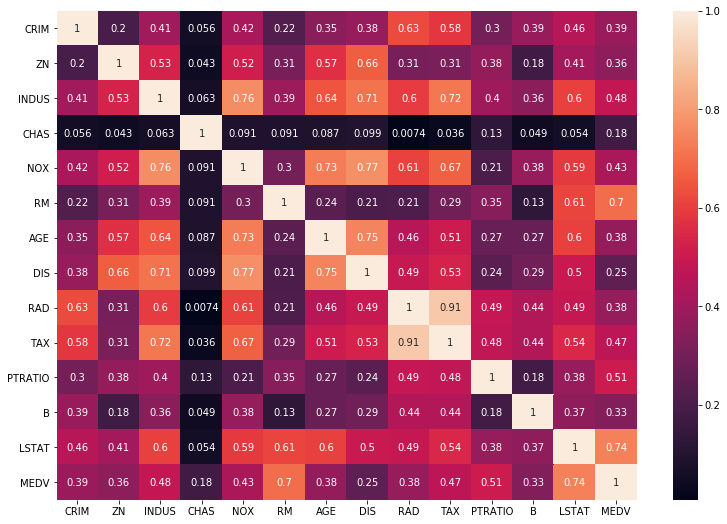

In [21]:
plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
#sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

#plt.savefig('house_coor.png' )
plt.show()

In [22]:
#Set the threshold to select only highly correlated attributes
threshold = 0.7
# List of pairs along with correlation above threshold
corr_list = []
size = data.shape[1]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

RAD and TAX = 0.91
NOX and DIS = 0.77
INDUS and NOX = 0.76
AGE and DIS = 0.75
LSTAT and MEDV = 0.74
NOX and AGE = 0.73
INDUS and TAX = 0.72
INDUS and DIS = 0.71


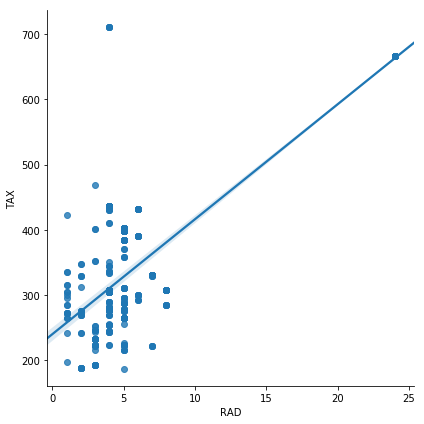

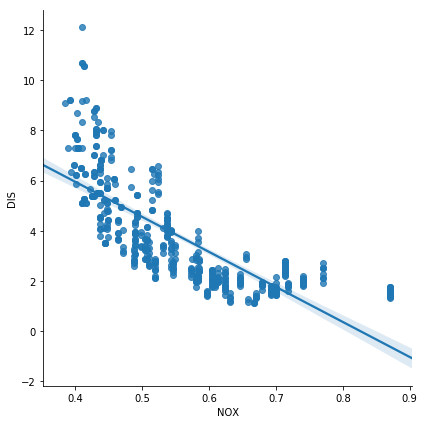

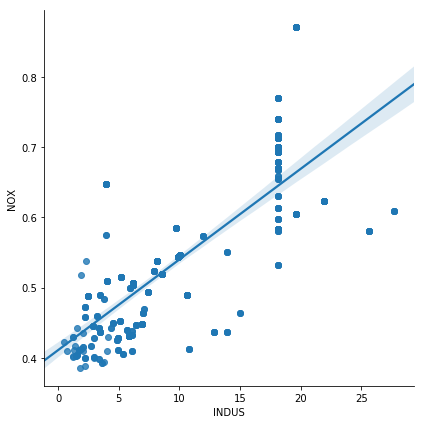

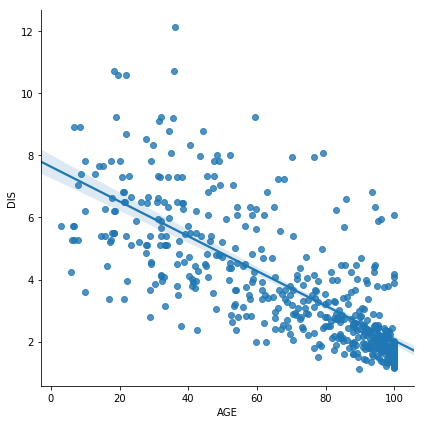

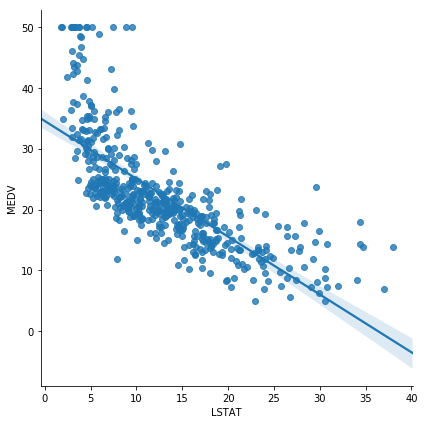

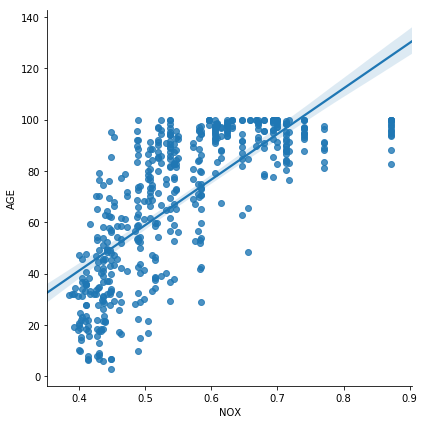

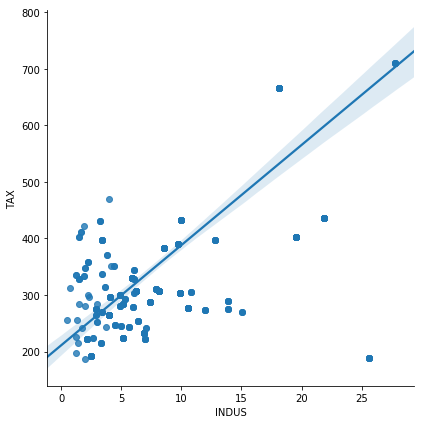

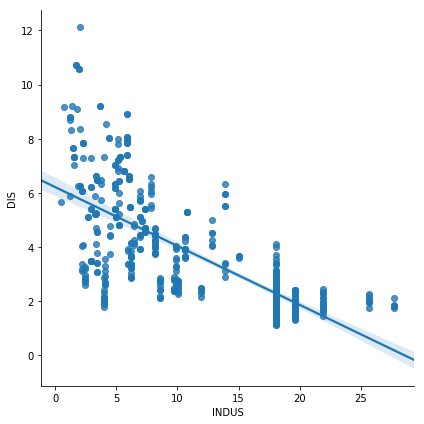

In [23]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.lmplot(x=cols[i], y=cols[j], data=data, size=6, )
    plt.show()